In [ ]:
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import os
# Create a new folder
os.mkdir('/content/gdrive/My Drive/KitchenIC')


In [ ]:
pip install opendatasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pathlib
from PIL import Image
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.utils import load_img
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import losses
import os
import csv
import random
import shutil

In [ ]:
import opendatasets as od
url = "https://www.kaggle.com/competitions/kitchenware-classification"
data = od.download(url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: ace991
Your Kaggle Key: ··········


100%|██████████| 1.63G/1.63G [01:45<00:00, 16.5MB/s]



Extracting archive ./kitchenware-classification/kitchenware-classification.zip to ./kitchenware-classification


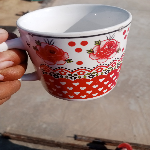

In [ ]:
folder_path = '/content/kitchenware-classification/images'
files = os.listdir(folder_path)
img = random.choice(files)
load_img(folder_path + '/' + img,target_size=(150,150))

In [ ]:
img_dir = "/content/kitchenware-classification/images/"

In [ ]:
train_data = '/content/kitchenware-classification/train.csv'
test_data = '/content/kitchenware-classification/test.csv'

In [ ]:
train_df = pd.read_csv(train_data)
test_df = pd.read_csv(test_data)

train_df['filename'] = train_df['Id'].apply(lambda x: f"{x:04d}.jpg")
test_df['filename'] = test_df['Id'].apply(lambda x: f"{x:04d}.jpg")
test_df.drop(columns=['Id'],inplace=True)

In [ ]:
train,val = train_test_split(train_df,test_size=0.25,random_state=42,stratify=train_df['label'])

In [ ]:
val.count()

Id          1390
label       1390
filename    1390
dtype: int64

In [ ]:
output_dir = "/content/kitchenware-classification/train"
os.makedirs(output_dir, exist_ok=True)

In [ ]:
path = img_dir
for _, row in train.iterrows():
    image_path = path + row["filename"]
    class_label = row["label"]

    class_folder = os.path.join(output_dir, str(class_label))
    os.makedirs(class_folder, exist_ok=True)


    shutil.move(image_path, class_folder)


In [ ]:
output_dir = "/content/kitchenware-classification/val"
os.makedirs(output_dir, exist_ok=True)

In [ ]:
path = img_dir
for _, row in val.iterrows():
    image_path = path + row["filename"]
    class_label = row["label"]

    class_folder = os.path.join(output_dir, str(class_label))
    os.makedirs(class_folder, exist_ok=True)


    shutil.move(image_path, class_folder)


In [ ]:
output_dir = "/content/kitchenware-classification/test"
os.makedirs(output_dir, exist_ok=True)

In [ ]:
for _, row in test_df.iterrows():
    image_path = path + row["filename"]
    shutil.move(image_path, output_dir)

In [ ]:
batch_size = 64
img_height = 150
img_width = 150
train_dir = "/content/kitchenware-classification/train"
val_dir = "/content/kitchenware-classification/val"
test_dir = "/content/kitchenware-classification/test"

In [ ]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  train_dir,
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size,
  shuffle=True,
  label_mode="categorical")

Found 4169 files belonging to 6 classes.


In [ ]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  val_dir,
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size,
  shuffle=True,
  label_mode="categorical")

Found 1390 files belonging to 6 classes.


In [ ]:
class_names = train_ds.class_names

In [ ]:
num_classes = 6
model = keras.models.Sequential()
model.add(layers.Conv2D(16,(3,3),padding='same',activation='relu',input_shape=(150,150,3)))
model.add(layers.MaxPooling2D())
model.add(layers.Conv2D(32,(3,3),padding='same',activation='relu'))
model.add(layers.MaxPooling2D())
model.add(layers.Conv2D(64,(3,3),padding='same',activation='relu'))
model.add(layers.MaxPooling2D())
model.add(layers.Conv2D(128,(3,3),padding='same',activation='relu'))
model.add(layers.MaxPooling2D())
model.add(layers.Flatten())
model.add(layers.Dense(256,activation='relu'))
model.add(layers.Dense(num_classes,activation='softmax'))

In [ ]:
model.compile(optimizer=keras.optimizers.Adam(),loss=losses.CategoricalCrossentropy(),metrics=['acc'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 37, 37, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 18, 18, 64)       0

In [ ]:
epochs = 20
training = model.fit(train_ds,
                     epochs=epochs,
                     batch_size=32,
                     validation_data=val_ds)

Epoch 1/20
66/66 [==============================] - 33s 293ms/step - loss: 7.7527 - acc: 0.3579 - val_loss: 1.3163 - val_acc: 0.4691
Epoch 2/20
66/66 [==============================] - 22s 315ms/step - loss: 1.1766 - acc: 0.5327 - val_loss: 1.0843 - val_acc: 0.5604
Epoch 3/20
66/66 [==============================] - 20s 283ms/step - loss: 0.9874 - acc: 0.6196 - val_loss: 1.0398 - val_acc: 0.6129
Epoch 4/20
66/66 [==============================] - 22s 308ms/step - loss: 0.7825 - acc: 0.7016 - val_loss: 1.0902 - val_acc: 0.6036
Epoch 5/20
66/66 [==============================] - 20s 287ms/step - loss: 0.6411 - acc: 0.7484 - val_loss: 1.0655 - val_acc: 0.6554
Epoch 6/20
66/66 [==============================] - 22s 311ms/step - loss: 0.5292 - acc: 0.7968 - val_loss: 0.9774 - val_acc: 0.6655
Epoch 7/20
66/66 [==============================] - 20s 282ms/step - loss: 0.4502 - acc: 0.8343 - val_loss: 1.1443 - val_acc: 0.6612
Epoch 8/20
66/66 [==============================] - 22s 311ms/step - 

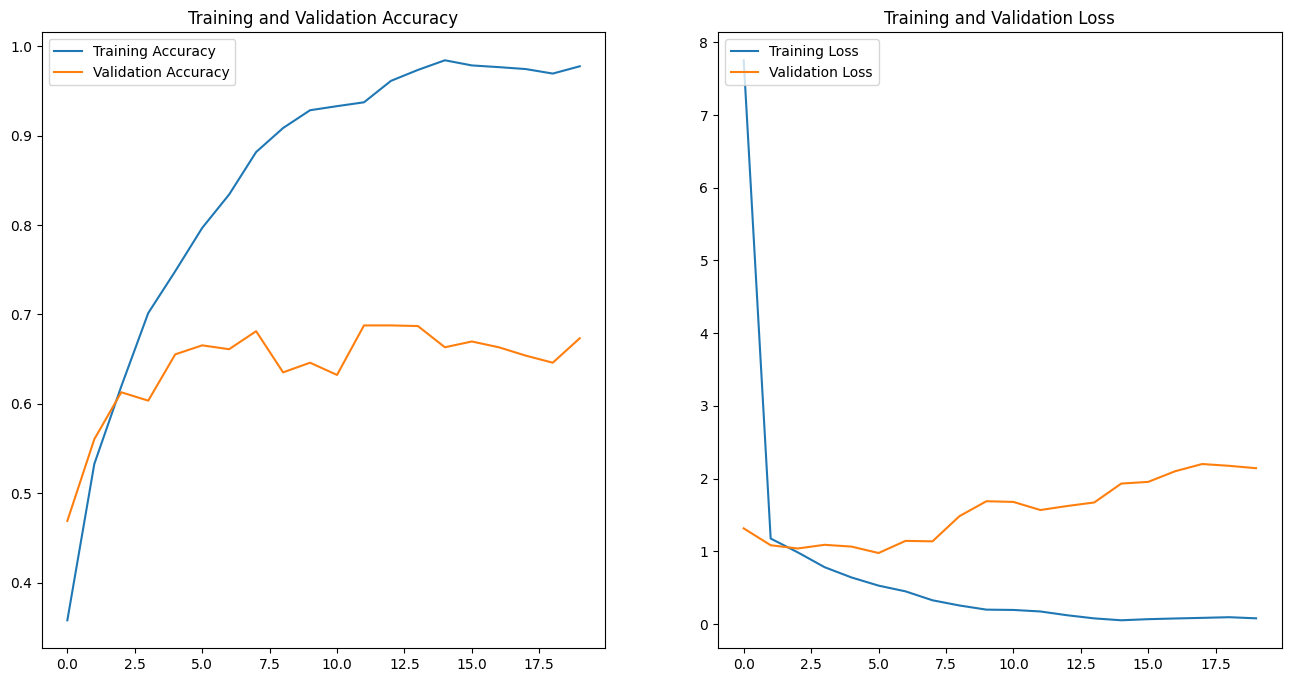

In [ ]:
acc = training.history['acc']
val_acc = training.history['val_acc']

loss = training.history['loss']
val_loss = training.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='upper left')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper left')
plt.title('Training and Validation Loss')
plt.show()


In [ ]:
model = keras.models.Sequential()
model.add(layers.RandomFlip(input_shape=(150,150,3)))
model.add(layers.RandomRotation(0.2))
model.add(layers.RandomZoom(0.5))
model.add(layers.RandomContrast(0.3))
model.add(layers.Conv2D(16,kernel_size=(3,3),padding='same',activation='relu'))
model.add(layers.MaxPooling2D())
model.add(layers.Conv2D(32,kernel_size=(3,3),padding='same',activation='relu'))
model.add(layers.MaxPooling2D())
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(64,kernel_size=(3,3),padding='same',activation='relu'))
model.add(layers.MaxPooling2D())
model.add(layers.Dropout(0.3))
model.add(layers.Conv2D(128,kernel_size=(3,3),padding='same',activation='relu'))
model.add(layers.MaxPooling2D())
model.add(layers.Dropout(0.3))
model.add(layers.Conv2D(256,kernel_size=(3,3),padding='same',activation='relu'))
model.add(layers.MaxPooling2D())
model.add(layers.Conv2D(512,kernel_size=(3,3),padding='same',activation='relu'))
model.add(layers.MaxPooling2D())
model.add(layers.Dropout(0.2))
model.add(layers.Conv2D(512,kernel_size=(3,3),padding='same',activation='relu'))
model.add(layers.MaxPooling2D())
model.add(layers.Flatten())
model.add(layers.Dense(512,activation='relu'))
model.add(layers.Dense(6,activation='softmax'))

In [ ]:
model.compile(optimizer=keras.optimizers.Adam(),loss=losses.CategoricalCrossentropy(),metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 random_flip (RandomFlip)    (None, 150, 150, 3)       0         
                                                                 
 random_rotation (RandomRota  (None, 150, 150, 3)      0         
 tion)                                                           
                                                                 
 random_zoom (RandomZoom)    (None, 150, 150, 3)       0         
                                                                 
 random_contrast (RandomCont  (None, 150, 150, 3)      0         
 rast)                                                           
                                                                 
 conv2d_4 (Conv2D)           (None, 150, 150, 16)      448       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 75, 75, 16)      

In [ ]:
model.save_weights('/content/gdrive/MyDrive/KitchenIC/model_v1.h5', save_format='h5')

In [ ]:
checkpoint = keras.callbacks.ModelCheckpoint(
    filepath='/content/gdrive/MyDrive/KitchenIC/kitchen_v1_{epoch:02d}_{val_accuracy:.3f}.h5',
    save_best_only=True,
    monitor='val_accuracy',
    mode='max'
)

In [ ]:
epochs = 200
training = model.fit(train_ds,
                     epochs=epochs,
                     batch_size=32,
                     validation_data=val_ds,
                     callbacks=[checkpoint])

Epoch 1/200
66/66 [==============================] - 27s 306ms/step - loss: 1.7862 - accuracy: 0.2591 - val_loss: 1.7334 - val_accuracy: 0.2396
Epoch 2/200
66/66 [==============================] - 22s 318ms/step - loss: 1.5754 - accuracy: 0.3332 - val_loss: 1.4866 - val_accuracy: 0.3403
Epoch 3/200
66/66 [==============================] - 21s 293ms/step - loss: 1.4035 - accuracy: 0.3965 - val_loss: 1.2494 - val_accuracy: 0.4784
Epoch 4/200
66/66 [==============================] - 24s 335ms/step - loss: 1.3352 - accuracy: 0.4229 - val_loss: 1.2303 - val_accuracy: 0.4604
Epoch 5/200
66/66 [==============================] - 21s 290ms/step - loss: 1.3098 - accuracy: 0.4286 - val_loss: 1.3102 - val_accuracy: 0.4302
Epoch 6/200
66/66 [==============================] - 22s 298ms/step - loss: 1.2623 - accuracy: 0.4596 - val_loss: 1.2300 - val_accuracy: 0.4813
Epoch 7/200
66/66 [==============================] - 26s 380ms/step - loss: 1.2470 - accuracy: 0.4634 - val_loss: 1.2003 - val_accuracy:

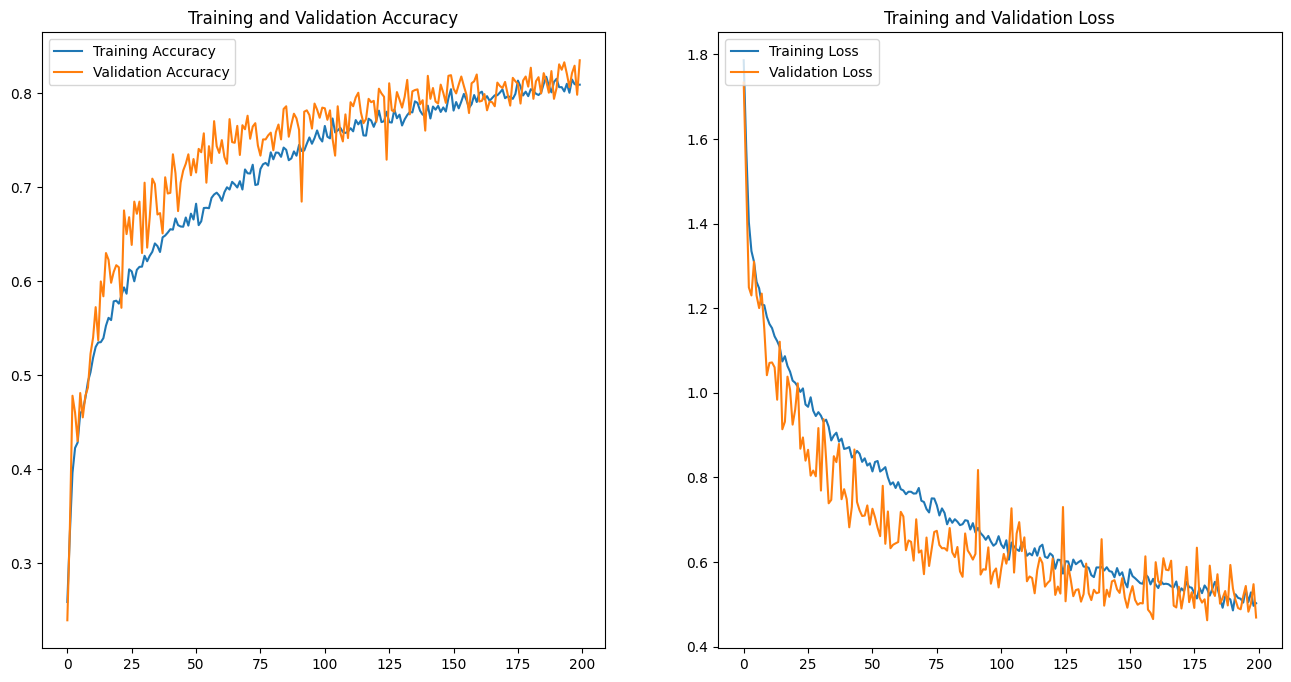

In [ ]:
acc = training.history['accuracy']
val_acc = training.history['val_accuracy']

loss = training.history['loss']
val_loss = training.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='upper left')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper left')
plt.title('Training and Validation Loss')
plt.show()


In [ ]:
model = tf.keras.models.load_model("/content/gdrive/MyDrive/KitchenIC/kitchen_v1_200_0.835.h5")

image_folder = "/content/kitchenware-classification/test"

image_files = os.listdir(image_folder)

results = []

for image_file in image_files:

    image_path = os.path.join(image_folder, image_file)

    img = tf.keras.utils.load_img(image_path, target_size=(img_height, img_width))
    img_array = tf.keras.utils.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)  # Add batch dimension

    predictions = model.predict(img_array)
    score = tf.nn.softmax(predictions[0])

    label = class_names[np.argmax(score)]
    confidence = np.max(score) * 100
    Id = image_file.split(".")[0]

    results.append([Id, label])

csv_file = "content/results.csv"

with open('results.csv', mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['Id', 'Label'])
    writer.writerows(results)

print("Results saved to:", csv_file)